図11.4のプロット

In [1]:
#計算とグラフプロットに必要なモジュールの読み込み
import numpy as np
from control import matlab
from matplotlib import pyplot as plt
from scipy import arange 
from scipy import signal

/Users/kaz/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/control/freqplot.py:153: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True);
/Users/kaz/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/Users/kaz/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
/Users/kaz/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/control/freqplot.py:163: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements wit

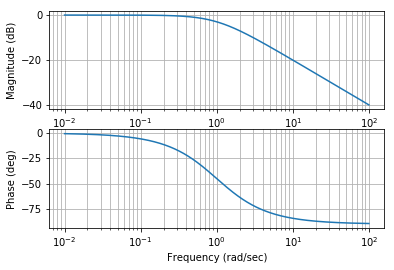

In [2]:
#1次遅れ系のパラメータ
T=1 #T=1
K=1 #K=1

#伝達関数の分子・分母多項式を与える
num = [0, K] #分子多項式
den = [T, 1] #分母多項式

#伝達関数表現を与える
sys = matlab.tf(num,den) #伝達関数表現

#角周波数の範囲を指定
w = np.logspace(-2, 2, 1000) #対数的に等間隔なベクトルの生成(10^{-2}から10^{2}で1000点)

# 図11.2のボード線図のプロット
gain, phase, w = matlab.bode(sys, w, dB=True) #ボード線図のプロット
plt.show()

上記の"matlab.bode"では環境によってはエラーが出る場合があるので，以後はscipyの"signal"モジュールを使ってボード線図を描く．
エラーを気にしない場合は，
mag, phase, w = matlab.bode(sys, w, dB=True)
として，wとmag, wとphaseをプロットすれば良い．ただし上記の"dB=True"を忘れないこと．

/Users/kaz/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/scipy/signal/filter_design.py:1549: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


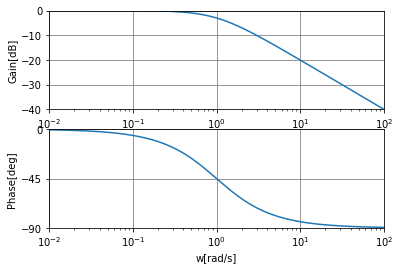

In [3]:
#伝達関数表現を与える
sys = signal.lti(num, den) #伝達関数表現（signal.ltiの場合）

#角周波数の範囲を指定
w = np.logspace(-2, 2, 1000) #対数的に等間隔なベクトルの生成(10^{-2}から10^{2}で1000点)

#周波数応答の計算．wは角周波数，gainはゲイン,phaseは位相を表す．
w, gain, phase = signal.bode(sys, w) #ゲインと位相の計算

# ゲイン線図のプロット
plt.subplot(2, 1, 1) #複数の図を並べるためのコマンド．2行1列の1行目という意味
plt.semilogx(w, gain) #ゲイン線図をプロット
plt.xlim([0.01,100]) #横軸（角周波数）の範囲の指定
plt.ylim([-40,0]) #縦軸の範囲の指定
plt.yticks([-40,-30,-20,-10,0])#縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("w[rad/s]") #横軸のラベル表示
plt.ylabel("Gain[dB]") #縦軸のラベル表示

# 位相線図の描画
plt.subplot(2, 1, 2) #複数の図を並べるためのコマンド．2行1列の2行目という意味
plt.semilogx(w, phase) #位相線図をプロット
plt.xlim([0.01,100]) #横軸の範囲の指定
plt.ylim([-90,0]) #縦軸の範囲の指定
plt.yticks([-90,-45,0]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("w[rad/s]") #横軸の表示
plt.ylabel("Phase[deg]") #縦軸の表示
plt.show() #グラフの表示